# Lab 4

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

import file for problem 1:

In [3]:
hf = h5py.File('gammaray_lab4.h5', 'r')

look at header of our single data set called 'data':

In [4]:
hf.keys()

<KeysViewHDF5 ['data']>

import data into an array variable

In [5]:
data = np.array(hf.get('data'))

Checking that data is as expected:
time (gps seconds), Solar phase (deg), Earth longitude (deg), and gamma-ray counts.

In [6]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

Close file

In [7]:
hf.close()

## Problem 1

In this problem we are looking at data from a gamma-ray satellite orbiting in low Earth orbit.

Features of this satellite:
- Takes reading of # of particles detected every 100 milliseconds
- Has approximately 90 minute orbit
- Looking for gamma-ray bursts, however virtually all of the particles detected are background cosmic rays

#### 1) Make plots and generally explore data. 

- Give a high level description of the data features you see
- Specifically comment on whether you see signal contamination
- Comment on how you plan to build a background pdf()

The data set has 4 columns:
Time in gps seconds, Solar phase degrees (showing the position of the sun relative to the earth orbit), Earth longitude degrees (giving the position of the spacecraft relative to the ground), and particle counts. 

First is a scatter plot:
- time vs. particle counts first 2000 data points starting at 0

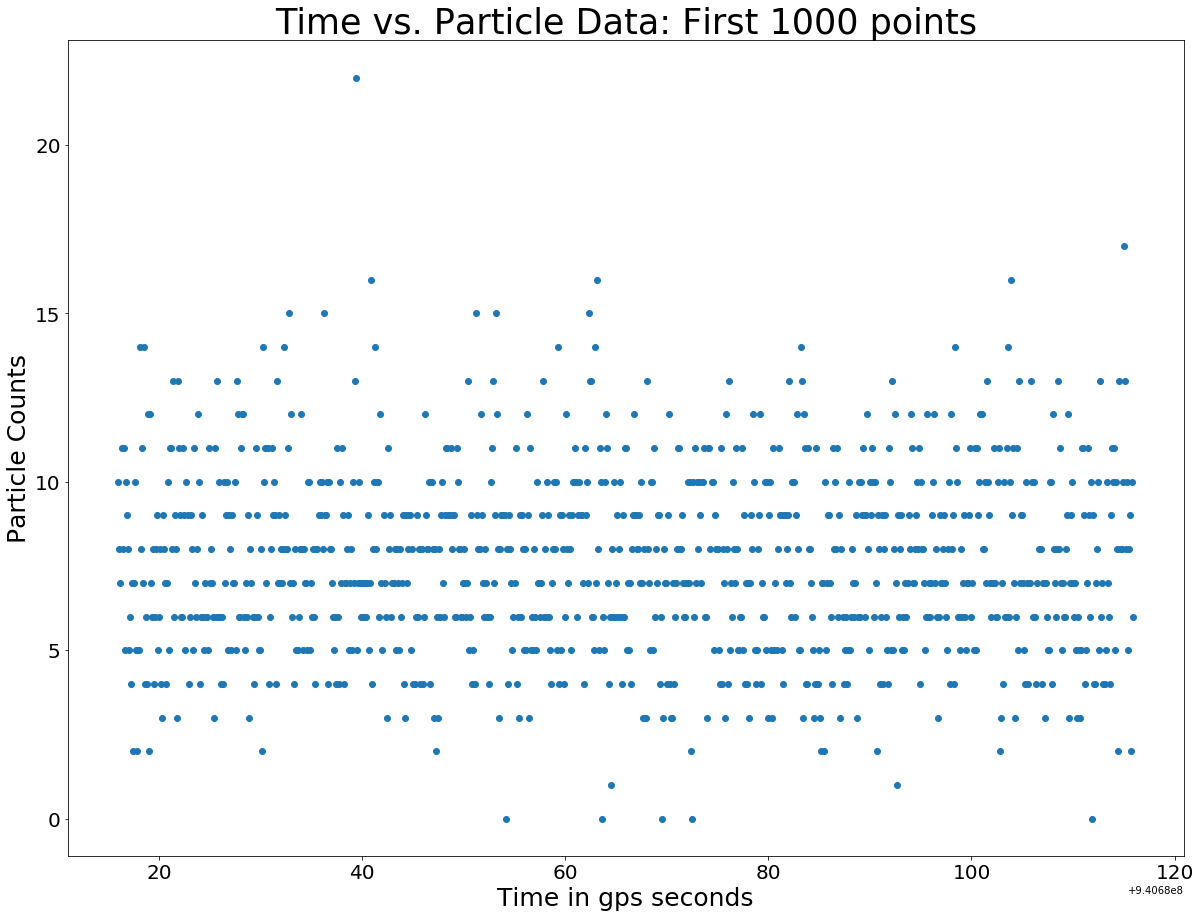

In [8]:
#----- PLOT: Time vs. Particle Data-----

#Specifies total number of data points to be plotted from background data
totalPoints = 1000

#Specifies starting point of dadtapoints
startPoint = 0

#Specifies the ending point
endPoint = totalPoints - startPoint

#Create data column array
t = data[0, :]

#take first set # of elements for time array
t = t[startPoint:endPoint]

#Create data column array 
particle = data[3,:]


particle = particle[startPoint:endPoint]


#Plot a scatter plot
fig, ax = plt.subplots(1,1)

ax.scatter(t, particle)

#Style plot
#ax.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Time in gps seconds', size = 25)
ax.set_ylabel('Particle Counts', size = 25)
ax.set_title('Time vs. Particle Data: First 1000 points', size = 35)
plt.show()

In [9]:
#histograms and scatter plots
#think about what the satelight is looking for, and how we tackle these specifics
#y axis is particle counts --> look at time dependence 

#brighter points are the points that have more of the same coordinates 
#gamma rays are trapped in the magnetic field of the sun
#trapped in solar wind ? solar wind background noise?

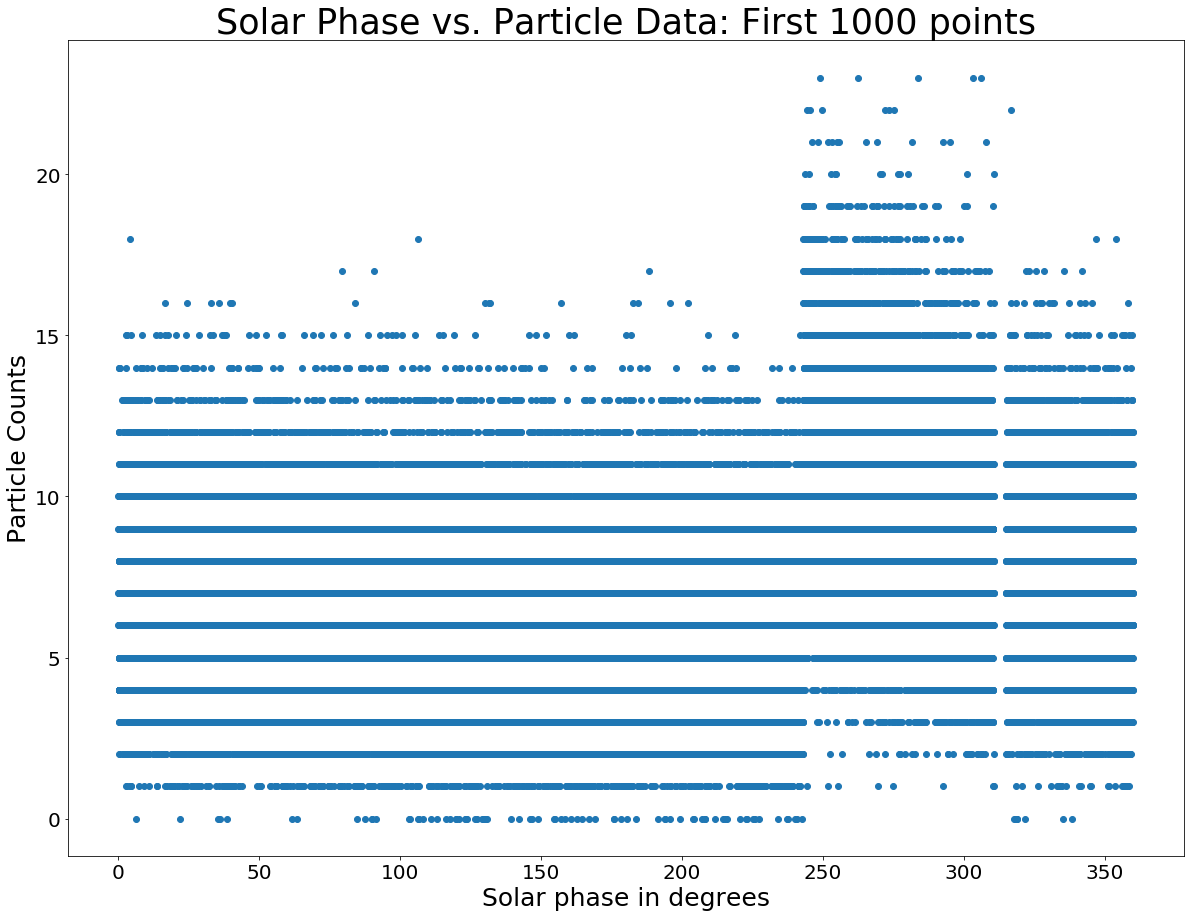

In [10]:
#----- PLOT: Solar angle vs. Particle Data-----


#Specifies total number of data points to be plotted from background data
totalPoints = 50000

#Specifies starting point of dadtapoints
startPoint = 0

#Specifies the ending point
endPoint = totalPoints - startPoint

#Create solar column array
solar = data[1, :]

#take first set # of elements for time array
solar = solar[startPoint:endPoint]

#Create data column array 
particle = data[3,:]


particle = particle[startPoint:endPoint]


#Plot a scatter plot
fig, ax = plt.subplots(1,1)

ax.scatter(solar, particle)

#Style plot
#ax.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Solar phase in degrees', size = 25)
ax.set_ylabel('Particle Counts', size = 25)
ax.set_title('Solar Phase vs. Particle Data: First 1000 points', size = 35)
plt.show()

From the plots above we can see...

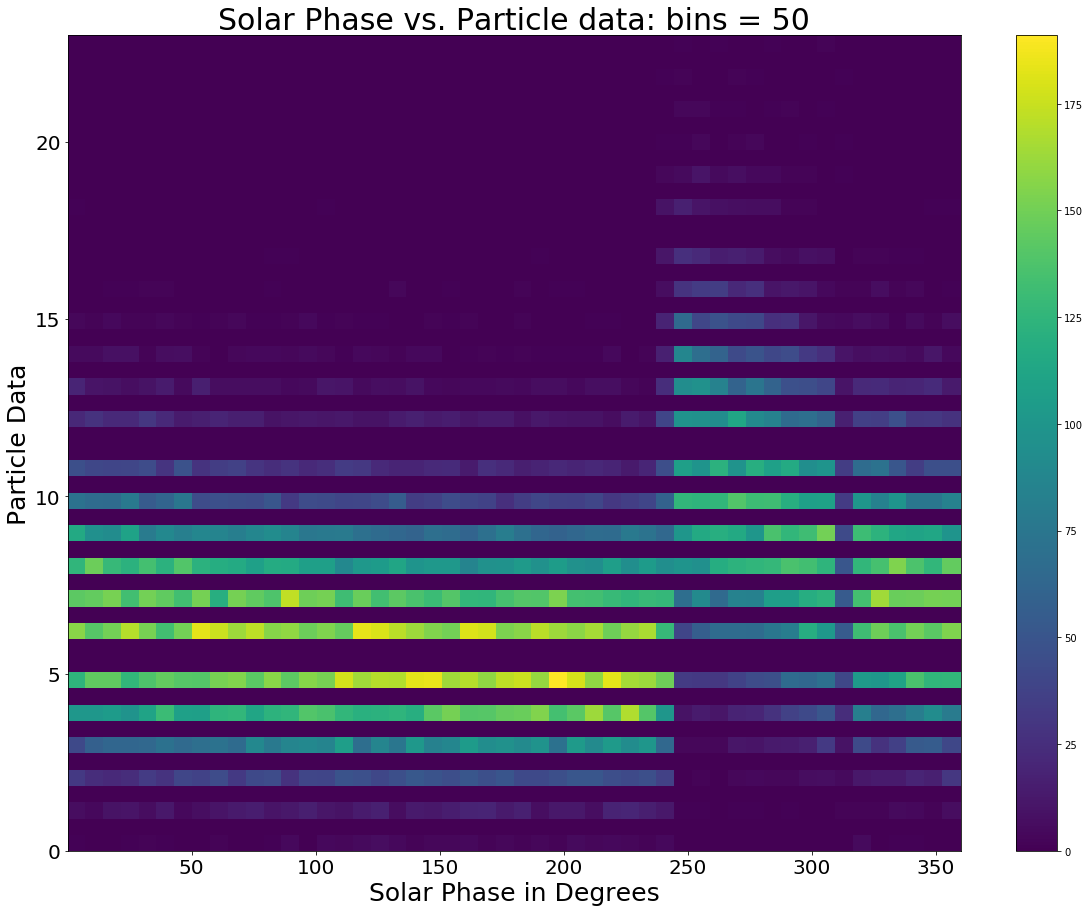

In [11]:
#-----Density: Bins = 25-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(solar, particle, bins = 50)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Solar Phase in Degrees', size = 25)
ax.set_ylabel('Particle Data', size = 25)
ax.set_title('Solar Phase vs. Particle data: bins = 50', size = 30)
plt.colorbar(h[3], ax=ax)
plt.show()

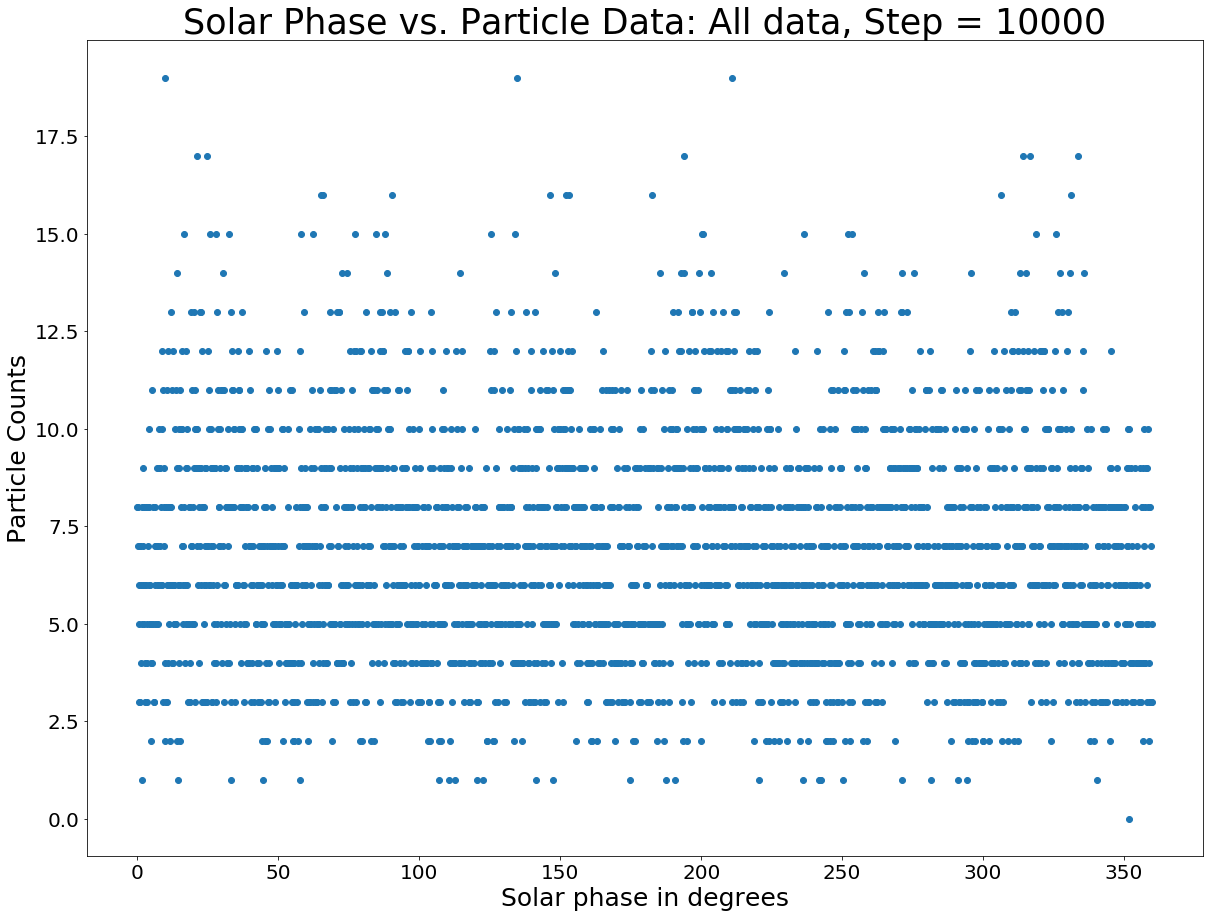

In [12]:
#step through data to find pattern
#use numpy sclicing (start:stop:step)
#define the step
step = 10000

#Specifies total number of data points to be plotted from background data
totalPoints = len(data[1, :])

#Specifies starting point of dadtapoints
start = 0

#Specifies the ending point
end = totalPoints - startPoint

#Create solar column array
solar = data[1, :]

#take first set # of elements for time array
solar = solar[start:end:step]

#Create data column array 
particle = data[3,:]

particle = particle[start:end:step]

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

ax.scatter(solar, particle)

#Style plot
#ax.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Solar phase in degrees', size = 25)
ax.set_ylabel('Particle Counts', size = 25)
ax.set_title('Solar Phase vs. Particle Data: All data, Step = 10000', size = 35)
plt.show()

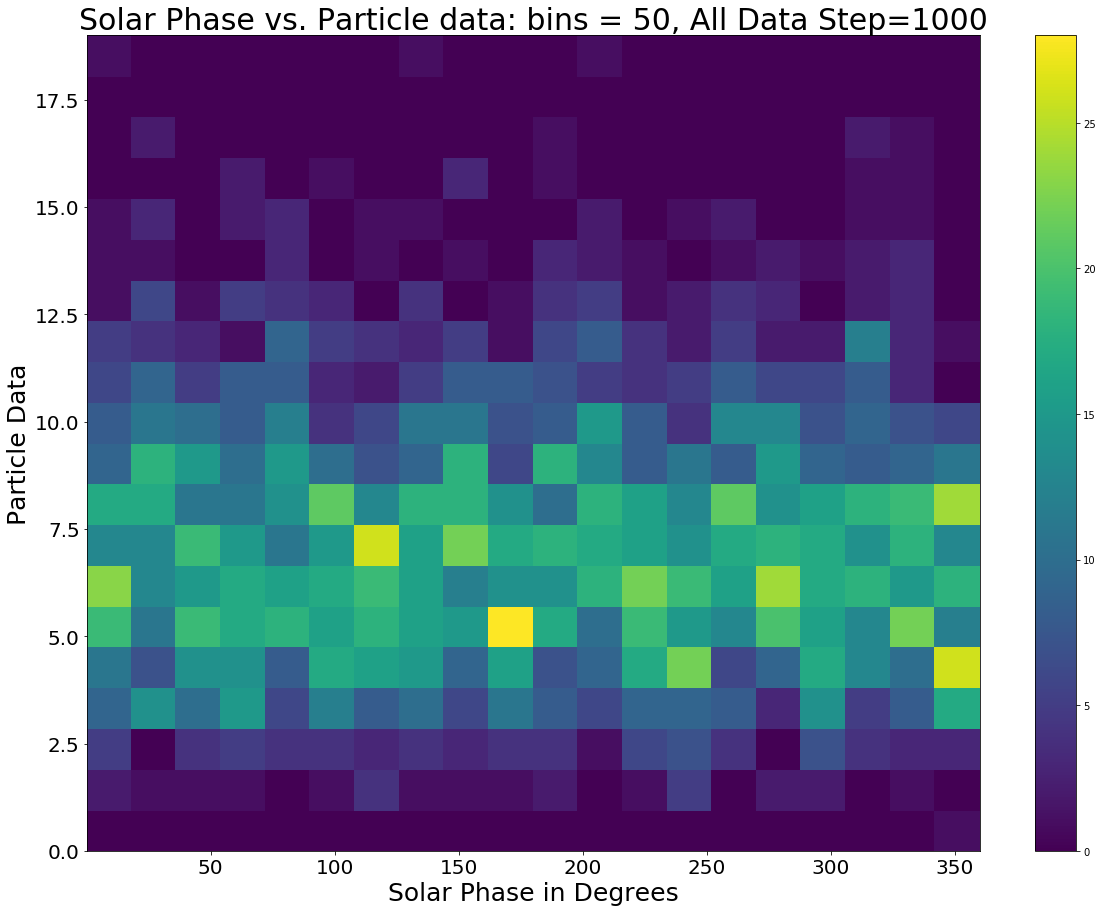

In [13]:
#-----Density: Bins = 25-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(solar, particle, bins = 20)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Solar Phase in Degrees', size = 25)
ax.set_ylabel('Particle Data', size = 25)
ax.set_title('Solar Phase vs. Particle data: bins = 50, All Data Step=1000', size = 30)
plt.colorbar(h[3], ax=ax)
plt.show()

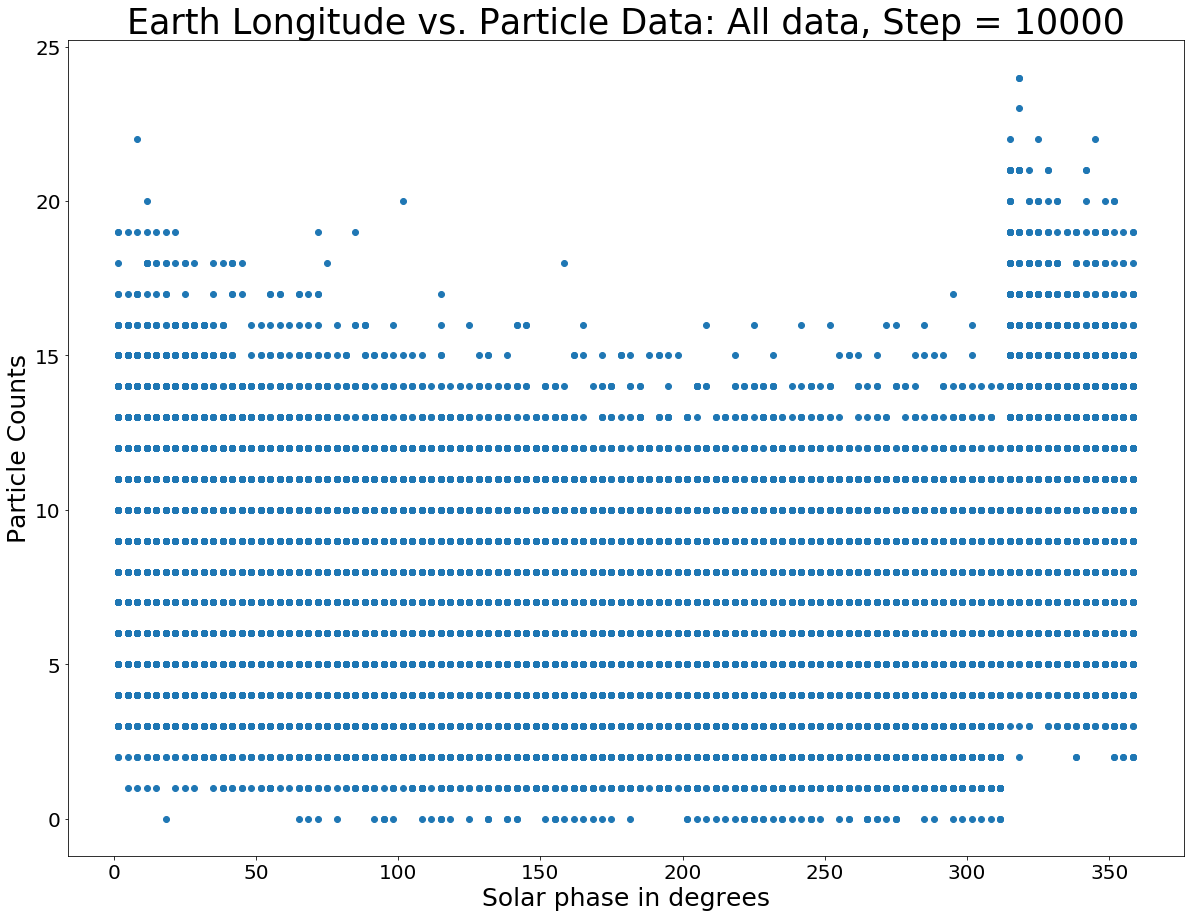

In [14]:
#step through data to find pattern
#use numpy sclicing (start:stop:step)
#define the step
step = 500

#Specifies total number of data points to be plotted from background data
totalPoints = len(data[1, :])

#Specifies starting point of dadtapoints
start = 0

#Specifies the ending point
end = totalPoints - startPoint

#Create solar column array
earthLongitude = data[2, :]

#take first set # of elements for time array
earthLongitude = earthLongitude[start:end:step]

#Create data column array 
particle = data[3,:]

particle = particle[start:end:step]

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

ax.scatter(earthLongitude, particle)

#Style plot
#ax.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Solar phase in degrees', size = 25)
ax.set_ylabel('Particle Counts', size = 25)
ax.set_title('Earth Longitude vs. Particle Data: All data, Step = 10000', size = 35)
plt.show()

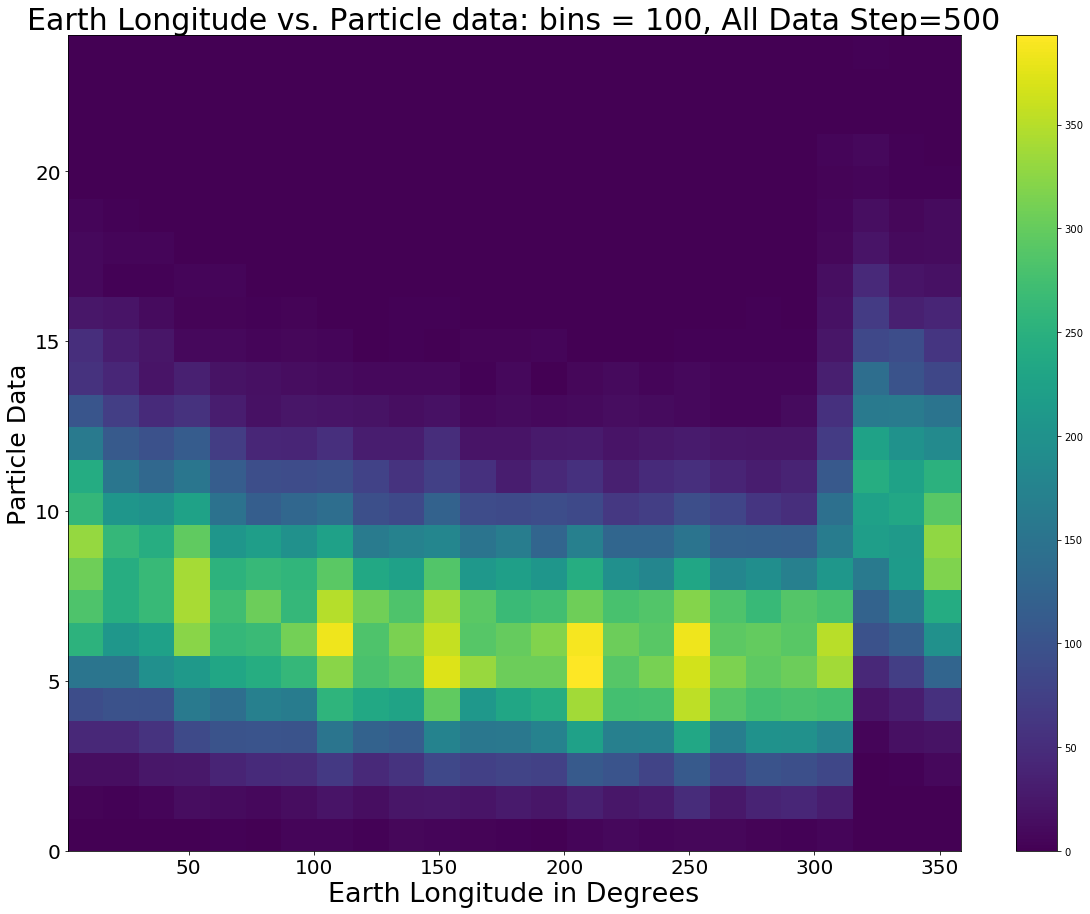

In [15]:
#-----Density: Bins = 25-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(earthLongitude, particle, bins = 25)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Earth Longitude in Degrees', size = 27)
ax.set_ylabel('Particle Data', size = 25)
ax.set_title('Earth Longitude vs. Particle data: bins = 100, All Data Step=500', size = 30)
plt.colorbar(h[3], ax=ax)
plt.show()

THere is definitely a corelation seen here between particle count and ever 50 degrees in solar phase

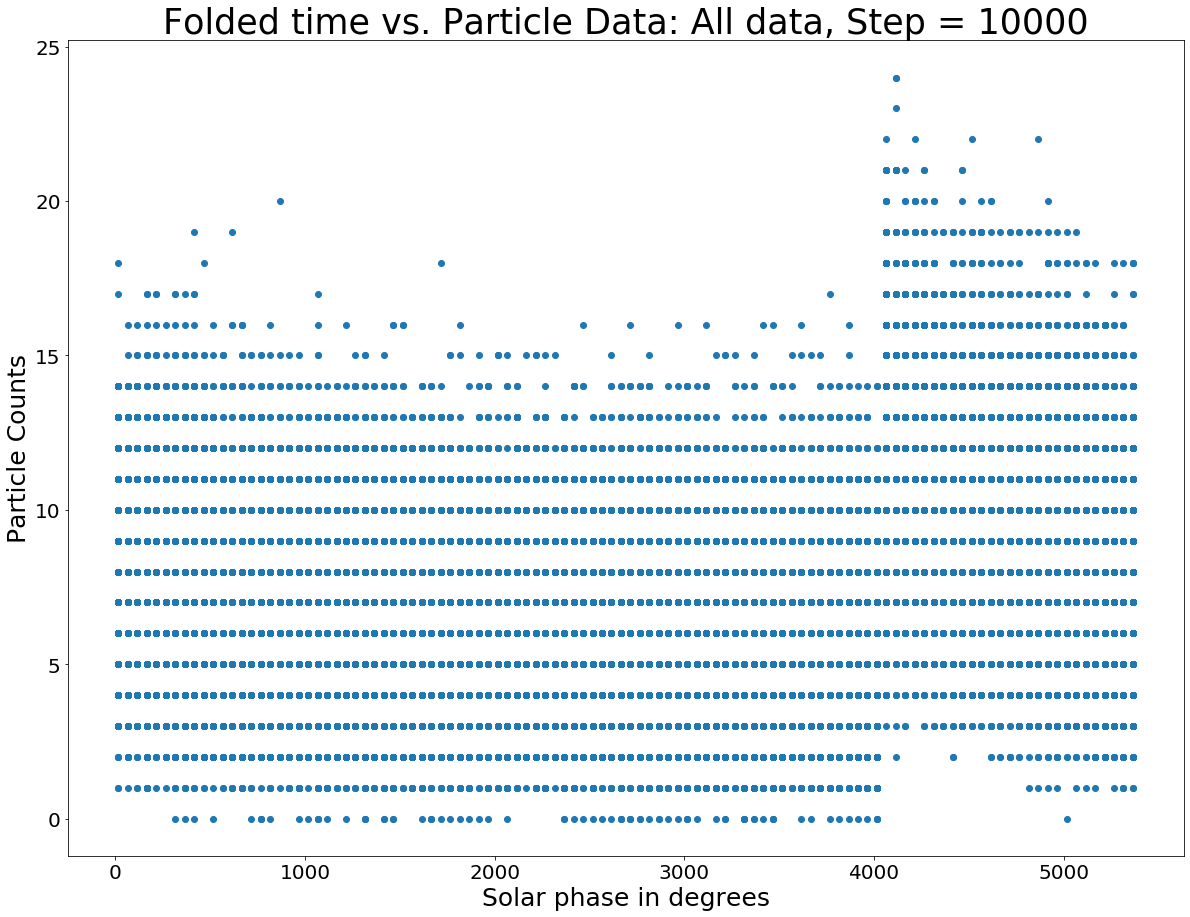

In [16]:
#FOLDED TIME AXIS PLOTS


#step through data to find pattern
#use numpy sclicing (start:stop:step)
#define the step
step = 500

#Specifies total number of data points to be plotted from background data
totalPoints = len(data[1, :])

#Specifies starting point of dadtapoints
start = 0

#Specifies the ending point
end = totalPoints - startPoint

#Create solar column array
time = data[0, :]

#take first set # of elements for time array
time = time[start:end:step]

time = time%5400

#Create data column array 
particle = data[3,:]

particle = particle[start:end:step]

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

ax.scatter(time, particle)

#Style plot
#ax.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Solar phase in degrees', size = 25)
ax.set_ylabel('Particle Counts', size = 25)
ax.set_title('Folded time vs. Particle Data: All data, Step = 10000', size = 35)
plt.show()

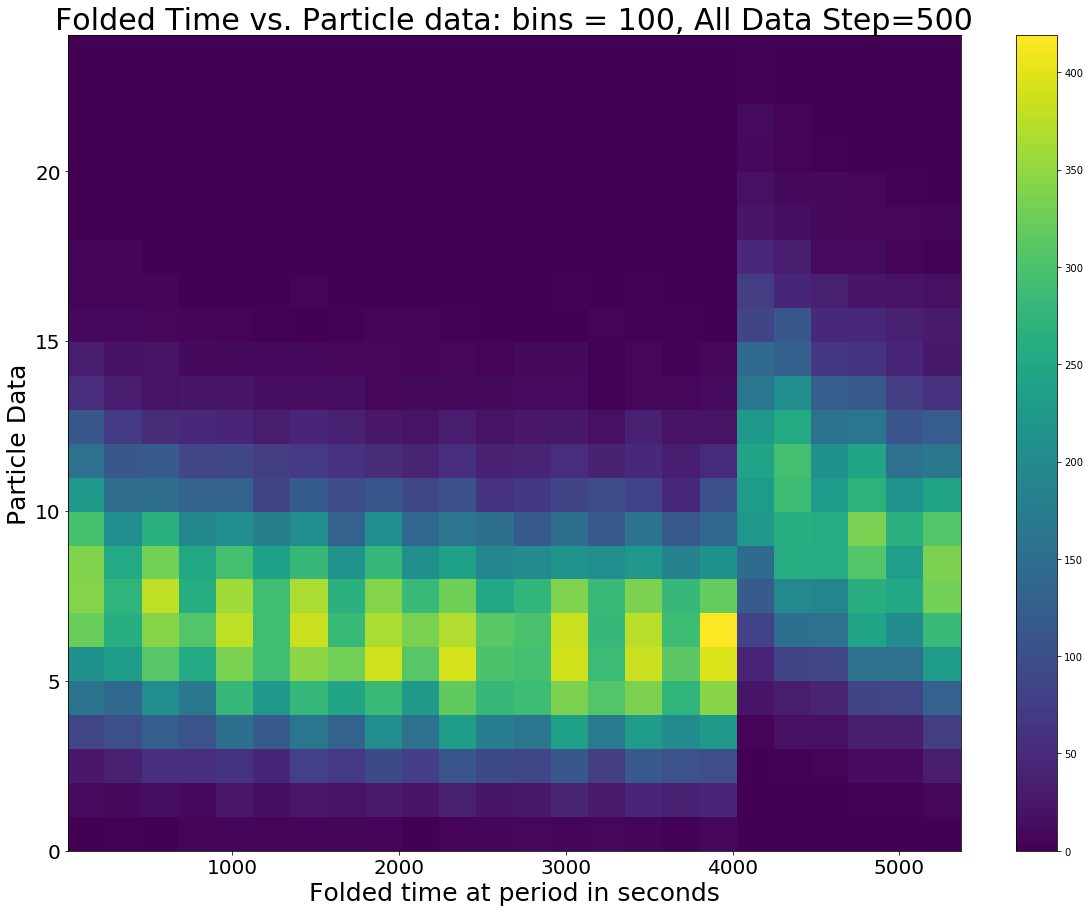

In [17]:
#-----Density: Bins = 25-----
#define time as hours so the repettitive neww stands out and you get intrevals 
#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(time, particle, bins = 24)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Folded time at period in seconds', size = 25)
ax.set_ylabel('Particle Data', size = 25)
ax.set_title('Folded Time vs. Particle data: bins = 100, All Data Step=500', size = 30)
#plt.xlim([4100, 9700])
plt.colorbar(h[3], ax=ax)
plt.show()

In [18]:
meanParticle = np.mean(particle)

print('mean of particle data = ', meanParticle)

mean of particle data =  7.101521961381918


From the graphs above we can see that there is a direct corelation between the earth longitude and particle data. Because the earth lognitude is changing at what looked like a steady pattern, this led us to look for a corelation in the particle data on a time axis that is folded by the period of the orbit of the satelite.  In the graph above (Folded time vs. Particle data) we see a clear trend in the particle data. Knowing from the problem statement that the particle data consists mostly of background cosmic rays, we believe this trend (seen in the yellow downward sloping line) is caused by the background noise which is the signal contamination.

Finding the mean of the particle data, which is the mean of the cosmic ray background contamination signal, helps us define a background pdf() that will fit the distribution we found.

#### 2) The background is not consistent across the dataset. Find and describe as accurately as you can how the background changes.

sort particle data, create fit pdf graph

because the background data repeats in a period, we need to sort the data to create a graph of all data points and find a pdf that represents the data.

In [19]:
#particle = particle with steps of 500
sortedParticle = np.sort(particle)

particleMean = np.mean(sortedParticle)

print('max value in sorted particle data =', max(sortedParticle))

#Find fit parameters 
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(sortedParticle)

print('Find Fit Parameters:')
print('    alpha = ', fit_alpha)
print('    loc = ', fit_loc)
print('    scale = ', fit_beta)

max value in sorted particle data = 24.0
Find Fit Parameters:
    alpha =  10.409004312887049
    loc =  -2.7073973349589924
    scale =  0.942349432992583


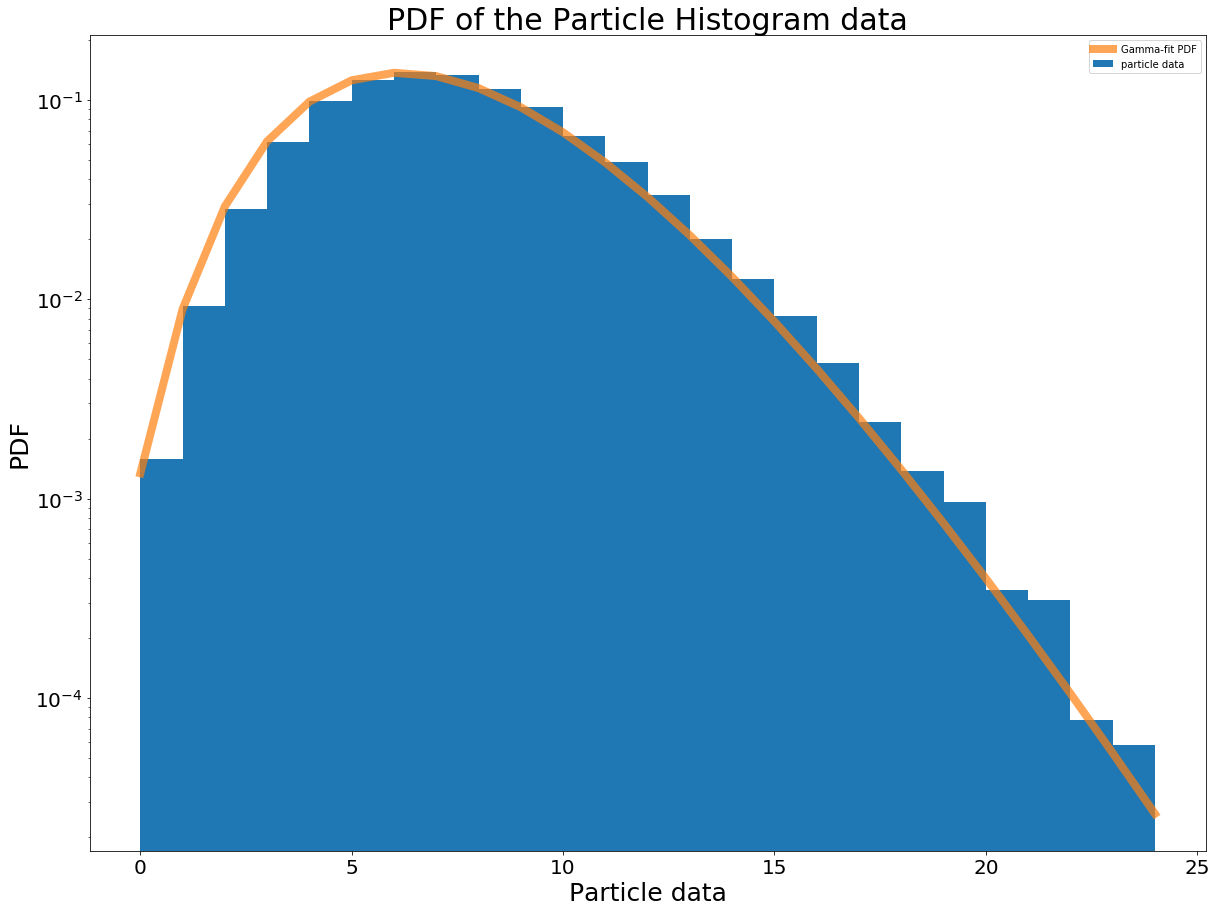

In [20]:
#-----Plot data and PDF------
#Histogram with Probability Density function
fig, ax = plt.subplots(1, 1)
plt.yscale('log')
ax.hist(sortedParticle,24, density=True, label='particle data')

plt.tick_params(labelsize = 20)

gammaFitPDF = stats.gamma.pdf(sortedParticle, a = fit_alpha, loc = fit_loc, scale = fit_beta)
ax.plot(sortedParticle,gammaFitPDF,linewidth = 8,alpha = 0.7, label='Gamma-fit PDF')

#Setting plot title and lables
ax.set_xlabel('Particle data', size = 25)
ax.set_ylabel('PDF', size = 25)
ax.set_title('PDF of the Particle Histogram data', size = 30)
plt.legend()
plt.show()

The particle data is a discrete dataset, so it will follow a discrete pdf distribution. By taking ever 500th value from our particle dataset, we are able to have a sample size that is small enough to easily work with but large enough to accurately represent all the data in the particle data set. By sorting our data before plotting, we are able to look at the data on a folded  axis, equivently looking at is as the particle data over a period. This allows to find the background trend over a period of the satelite orbit. 

After trying different fits, we found that our data follows a gamma-fit distribution best. The orange line represents the PDF of a gamma-fit, and the blue is the histogram data for from our particle data. We fit the gamma pdf to our background data, and set the number of bins equal to the largest number in the particle dataset (24) so it makes a bin for each number of particle counts, and the probability of getting more particle counts is incredibly low. 

The background is **not consistent** because it repeats in a periodic pattern across the dataset. It repeats every orbit of the satelite. This means **the background changes based on the orbit period of the satelite.**, and overall changes...


#### 3) Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?

In [21]:
#Model for background that includes time dependence
# -We create a model for background data that follows the gamma pdf() we 
# -found in the above question, and plot it on a time dependent scale of one period
# - because the non time dependent pdf is still time dependedt cuz it's based on the period

#EXPLICITLY compaare your model to the data.
# - to explicitly comapare our model to the data, we take 

#How good is your model of the background

In [22]:
# #Create model data of background noise data

# #Using the mean from the actuall particle data, we are creating model poisson distributed data
# #with the same mean
timeGpsFold = (data[0,::100] - 3900)%5200

#backgroundData = np.sort(stats.poisson.rvs(a = fit_alpha, loc = fit_loc, scale = fit_beta, size = len(timeGpsFold)))
backgroundData = np.sort(stats.poisson.rvs(loc = 0, mu = meanParticle, size = len(timeGpsFold)))

#time dependent data



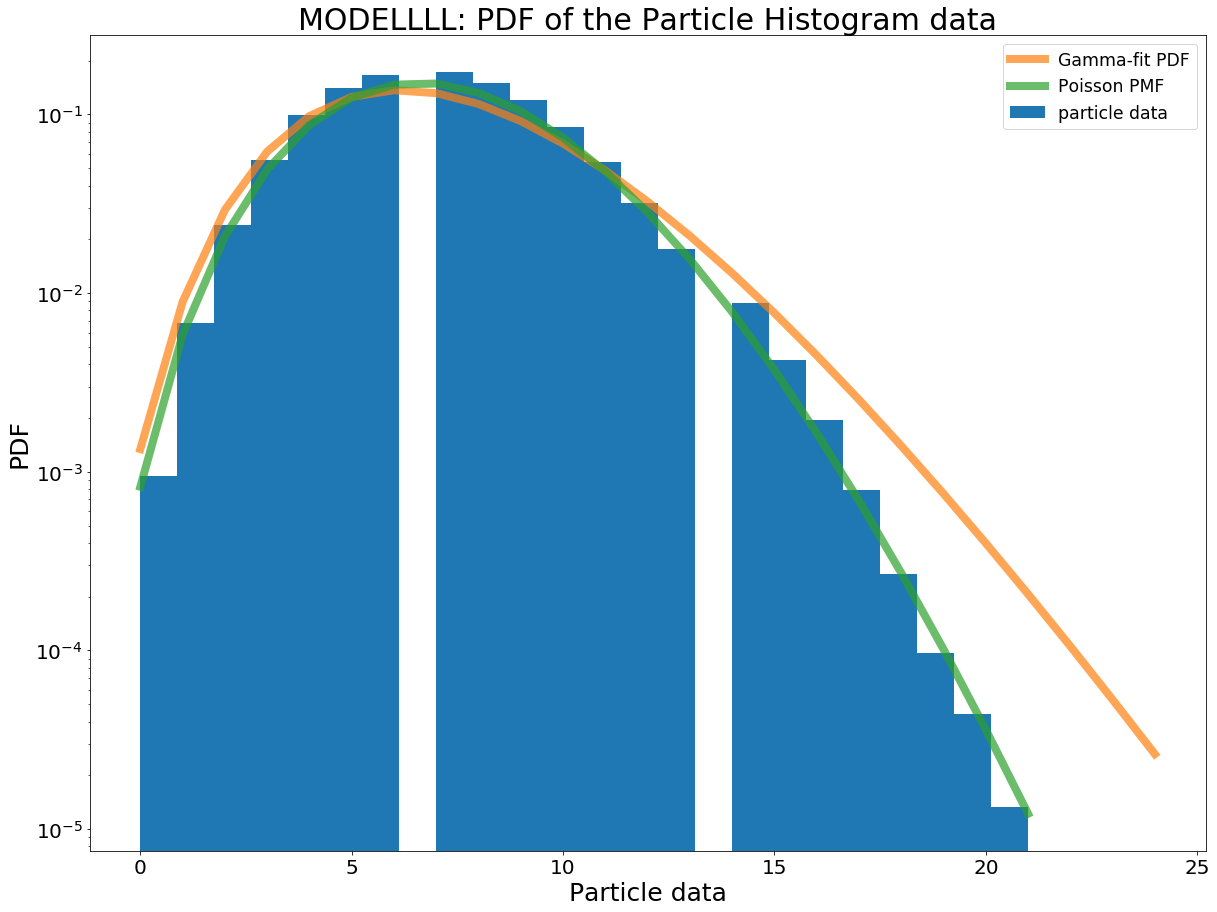

In [23]:
fig, ax = plt.subplots(1, 1)
plt.yscale('log')

ax.hist(backgroundData,24, density=True, label='particle data')



gammaFitPDF = stats.gamma.pdf(sortedParticle, a = fit_alpha, loc = fit_loc, scale = fit_beta)
ax.plot(sortedParticle,gammaFitPDF,linewidth = 8,alpha = 0.7, label='Gamma-fit PDF')

poissonPMF = stats.poisson.pmf(backgroundData, loc = 0, mu = meanParticle)

ax.plot(backgroundData, poissonPMF, linewidth = 8,alpha = 0.7, label='Poisson PMF')

#Setting plot title and lables
plt.tick_params(labelsize = 20)
ax.set_xlabel('Particle data', size = 25)
ax.set_ylabel('PDF', size = 25)
ax.set_title('MODELLLL: PDF of the Particle Histogram data', size = 30)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

Above is a model of fake particle data. the particle data is poisson random varriates. this is because the real data is measured discreately, so our model data needs to be discrete.

The random variates are time dependent because they are the distribution of particle measurements over a period of the time measured.

Above, the blue histogram is the modeled poisson distributed background data over one period. It is starting at the beginning of the orbit period, and ends at the end of the period, and it has the same mean value of 7.105. as the real particle data given. The orange line is the PDF of the ACTUALL particle data set.This graph EXPLICITLY shows that our poisson distributed model of the background is very close to the probability distribution background we found from the actuall data.



#### 4) Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?

- NOTE: find 5-sigma discovery threshold for 100 millisec GRB at DIFFERENT times

//Take subset of probability data to ...
How do we change the time?

What does a 100 millisecond GRB mean?

Different times??????????

In [27]:
#Find probability coresponding to 5-sigma
sigma = 5
prob5 = stats.norm.sf(sigma, loc=0, scale=1)
print('probability coresponding to 5-sigma:', prob5)

probability coresponding to 5-sigma: 2.866515718791933e-07


In [34]:
#Find 5-sigma threshold value for all time
threshold = stats.gamma.ppf(1-prob5, a = fit_alpha, loc = fit_loc, scale = fit_beta)
print('For all averaged time: 5-sigma threshold =', threshold)

For all averaged time: 5-sigma threshold = 30.38410054980654


## Problem 2

Looking at a stack of telescope images. 

We have 10 images, both labpartners are lookinf for different signals. One for faintest starst, other for transient signals.

I will be looking for.... > note either one it's gonna be a super similar if not same algorithem just looking for opposites faint or bright


#### 1) Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.


Data:
- stack of 10 square images
- 200 pixels on a side --> 400 pixels in an image
- LOOK AT STACK DATA

image stack is [200,200, 10]
- Ten images corelating to 200 pixels per side

In [39]:
#Imports file
hf = h5py.File('images.h5', 'r')

#Looks at header
hf.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [40]:
#Imports data into workable arrays
image1 = np.array(hf.get('image1'))

imagestack = np.array(hf.get('imagestack'))

#Closes file
hf.close()

#### 2) Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().

In [68]:
#Find the size of each dimension
print('image1 shape:', image1.shape)

image1 shape:  (200, 200)


In [69]:
#Find the size of each dimension
print('imagestack shape:', imagestack.shape)

imagestack shape: (200, 200, 10)


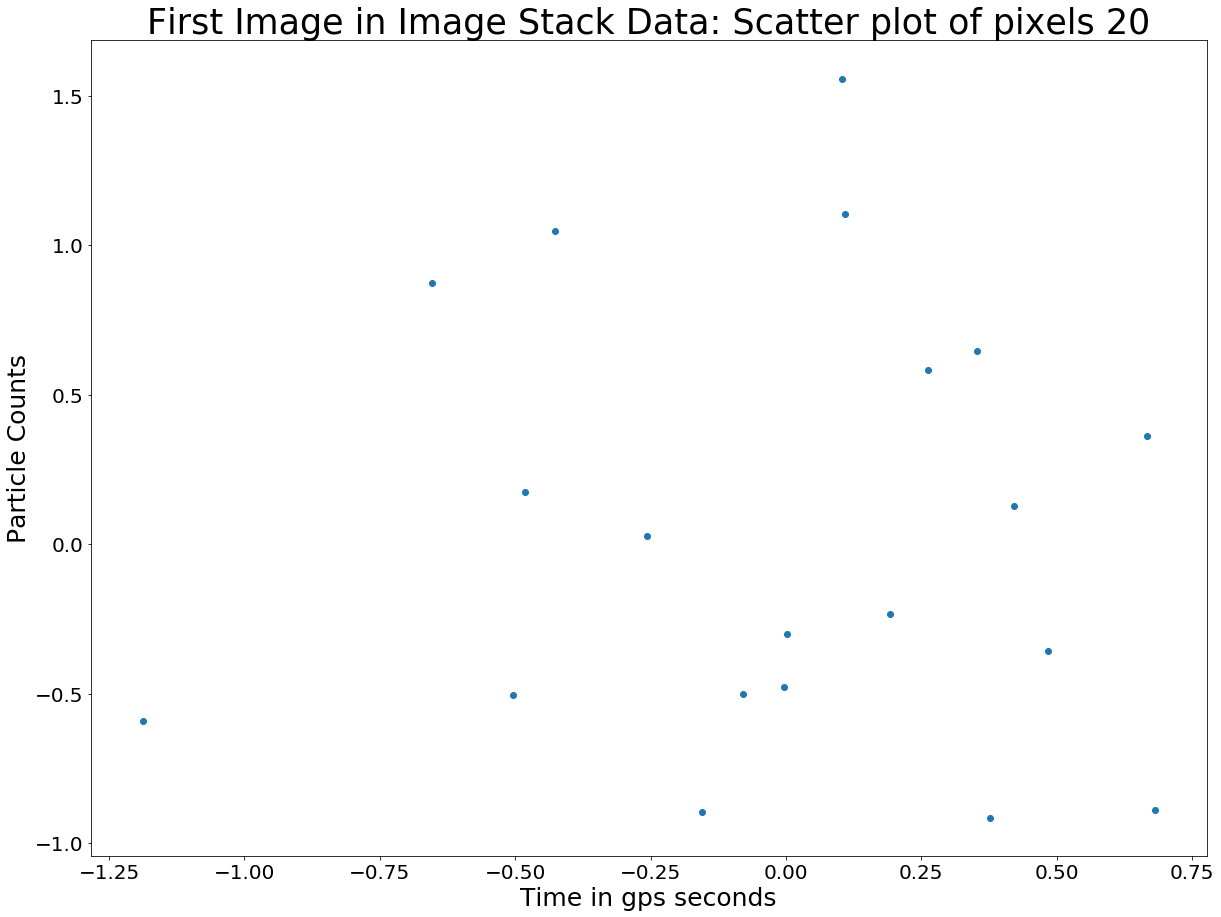

In [87]:
#look at image stack data 
imagestack_1 = imagestack[::10,0,0]

imagestack_2 = imagestack[0,::10,0]


#Plot a scatter plot
fig, ax = plt.subplots(1,1)

ax.scatter(imagestack_1, imagestack_2)
#Style plot
#ax.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Time in gps seconds', size = 25)
ax.set_ylabel('Particle Counts', size = 25)
ax.set_title('First Image in Image Stack Data: Scatter plot of pixels 20', size = 35)
plt.show()



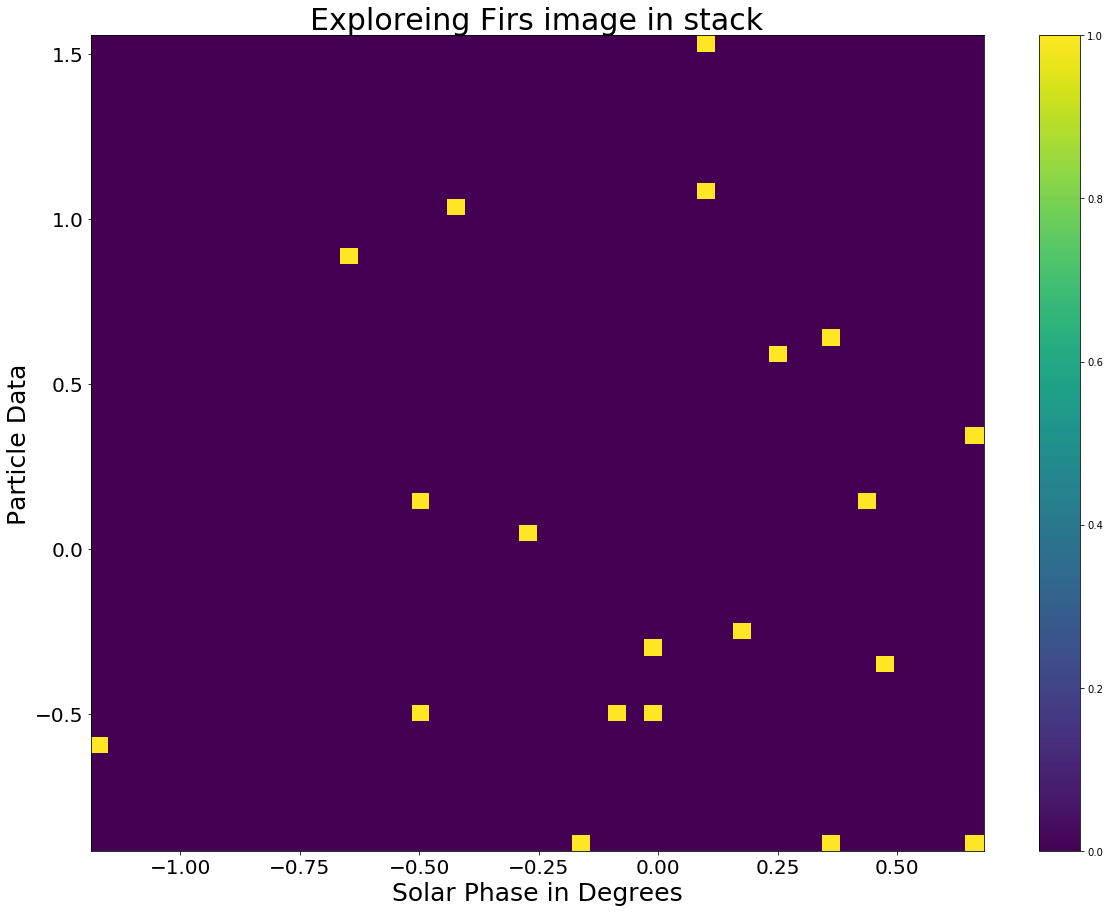

In [89]:

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(imagestack_1, imagestack_2, bins = 50)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Solar Phase in Degrees', size = 25)
ax.set_ylabel('Particle Data', size = 25)
ax.set_title('Exploreing Firs image in stack', size = 30)
plt.colorbar(h[3], ax=ax)
plt.show()